### **Made by: Agustinus Angelo Christian Fernando**

# **Scrape Google Trends**

In [8]:
from apify_client import ApifyClient

client = ApifyClient('your-api-token')

run_input = {
    "searchTerms": ["Ganjar", "Prabowo", "Anies"],
    "timeRange": 'today 3-m',
    "viewedFrom": "",
    "outputAsISODate": True,
    "csvOutput": True,
}

run = client.actor('emastra/google-trends-scraper').call(run_input=run_input)

data = list(client.dataset(run['defaultDatasetId']).iterate_items())

In [11]:
data

[{'date': '2023-09-21T00:00:00.000Z', 'Prabowo': '18'},
 {'date': '2023-09-22T00:00:00.000Z', 'Prabowo': '18'},
 {'date': '2023-09-23T00:00:00.000Z', 'Prabowo': '16'},
 {'date': '2023-09-24T00:00:00.000Z', 'Prabowo': '13'},
 {'date': '2023-09-25T00:00:00.000Z', 'Prabowo': '12'},
 {'date': '2023-09-26T00:00:00.000Z', 'Prabowo': '10'},
 {'date': '2023-09-27T00:00:00.000Z', 'Prabowo': '10'},
 {'date': '2023-09-28T00:00:00.000Z', 'Prabowo': '10'},
 {'date': '2023-09-29T00:00:00.000Z', 'Prabowo': '10'},
 {'date': '2023-09-30T00:00:00.000Z', 'Prabowo': '11'},
 {'date': '2023-10-01T00:00:00.000Z', 'Prabowo': '11'},
 {'date': '2023-10-02T00:00:00.000Z', 'Prabowo': '10'},
 {'date': '2023-10-03T00:00:00.000Z', 'Prabowo': '9'},
 {'date': '2023-10-04T00:00:00.000Z', 'Prabowo': '8'},
 {'date': '2023-10-05T00:00:00.000Z', 'Prabowo': '10'},
 {'date': '2023-10-06T00:00:00.000Z', 'Prabowo': '8'},
 {'date': '2023-10-07T00:00:00.000Z', 'Prabowo': '9'},
 {'date': '2023-10-08T00:00:00.000Z', 'Prabowo': '10

In [12]:
import datetime
import csv

timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

csv_file = f'google_trends_data_{timestamp}.csv'

with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Date', 'Name', 'Trend Value'])  

    for item in data:
        date = item.get('date', 'Unknown')  
        for name, trend_value in item.items():
            if name != 'date': 
                writer.writerow([date, name, trend_value])

print(f'Data saved to {csv_file}')

Data saved to google_trends_data_2023-12-21_09-49-51.csv


# **EDA**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv(csv_file)
df.head()

,Date,Name,Trend Value
0,2023-09-21T00:00:00.000Z,Prabowo,18
1,2023-09-22T00:00:00.000Z,Prabowo,18
2,2023-09-23T00:00:00.000Z,Prabowo,16
3,2023-09-24T00:00:00.000Z,Prabowo,13
4,2023-09-25T00:00:00.000Z,Prabowo,12


In [14]:
df['Date'] = pd.to_datetime(df['Date'])

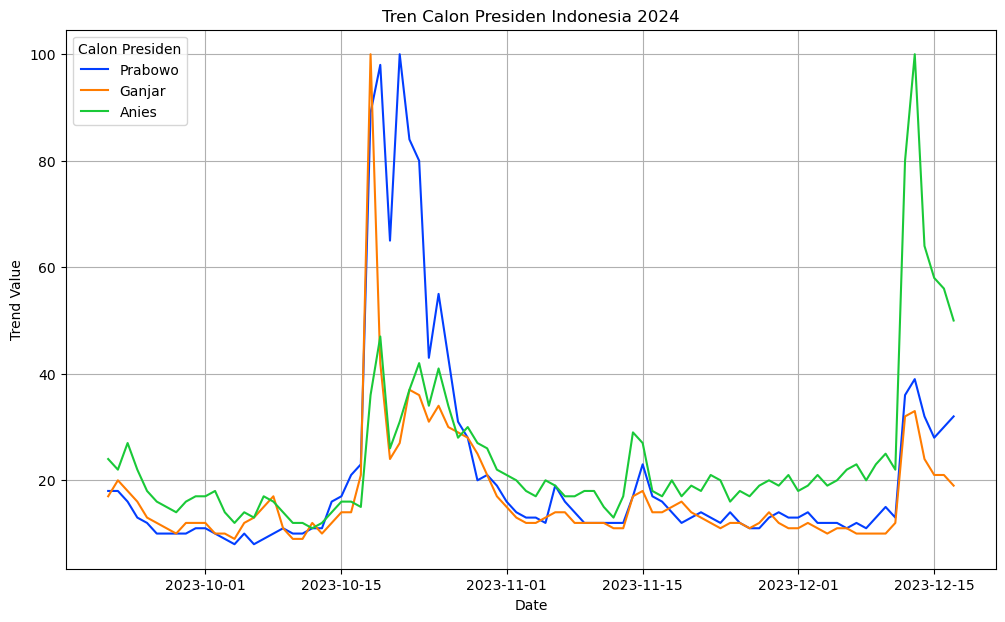

In [41]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=df, x='Date', y='Trend Value', hue='Name', palette='bright')

plt.title('Tren Calon Presiden Indonesia 2024')
plt.xlabel('Date')
plt.ylabel('Trend Value')
plt.legend(title='Calon Presiden')
plt.grid(True)
plt.show()

Tampak bahwa trend Ganjar dan Prabowo mengalami lonjakan signifikan sekitar tanggal 18-23 Oktober 2023. Hal tersebut masuk akal karena sekitar tanggal tersebut para capres secara resmi mendaftarkan dirinya ke KPU sehingga masyarakat mulai mencari informasi tentang capres tersebut.

Trend Anies mengalami lonjakan signifikan pada tanggal 12 Desember 2023. Pada tanggal tersebut terjadi debat capres pertama. Debat capres ini menyebabkan angka pencarian Anies naik drastis.

Secara umum, tampak bahwa trend Anies lebih tinggi dibandingkan kedua calon presiden yang lain.

C:\Users\Nando\AppData\Local\Temp\ipykernel_5472\859823599.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Date'].dt.to_period('M')


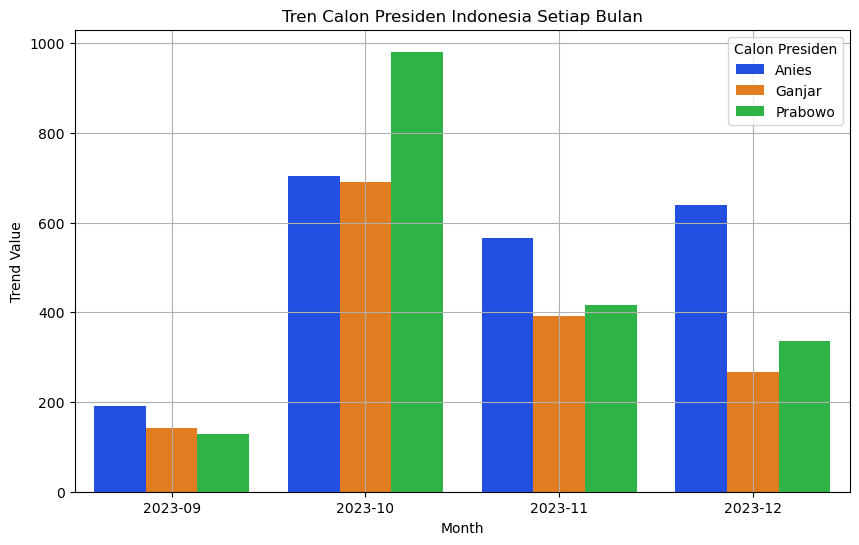

In [42]:
df['Month'] = df['Date'].dt.to_period('M')

monthly_trends = df.groupby(['Name', 'Month'])['Trend Value'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_trends, x='Month', y='Trend Value', hue='Name', palette='bright')

plt.title('Tren Calon Presiden Indonesia Setiap Bulan')
plt.xlabel('Month')
plt.ylabel('Trend Value')
plt.legend(title='Calon Presiden')
plt.grid(True)
plt.show()

Tampak bahwa trend Prabowo sangat tinggi pada bulan Oktober 2023.

Pada bulan September, November, dan Desember, trend Anies yang paling tinggi dibandingkan capres yang lain.

Mayoritas trend Ganjar lebih rendah dari 2 capres lainnya.

Fakta menarik dari data tersebut tampak pada bulan Oktober di mana trend Prabowo menjadi sangat tinggi.
Hal ini disebabkan karena pada tanggal 22 Oktober 2023, Prabowo resmi menggandeng Gibran menjadi calon wakil presidennya dan hal ini cukup mengejutkan untuk masyarakat Indonesia sehingga banyak masyarakat Indonesia mencari tahu tentang hal ini.

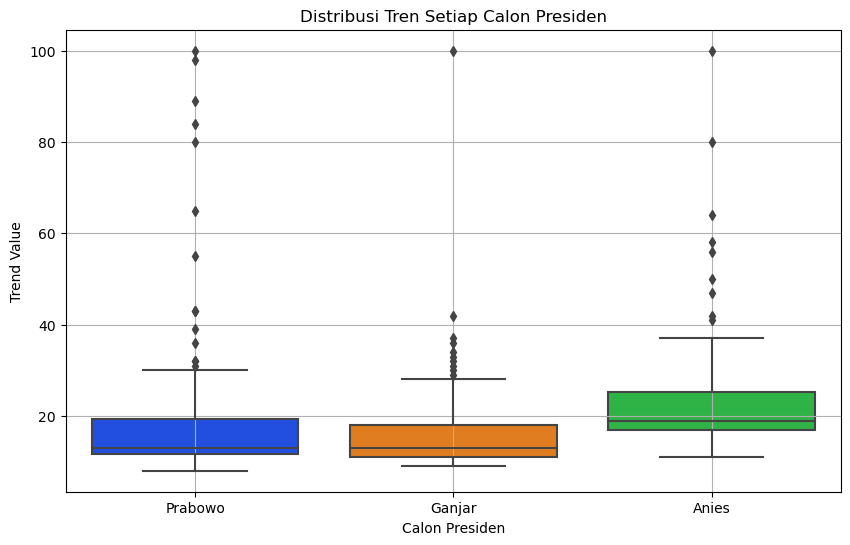

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Name', y='Trend Value', palette='bright')

plt.title('Distribusi Tren Setiap Calon Presiden')
plt.xlabel('Calon Presiden')
plt.ylabel('Trend Value')
plt.grid(True)
plt.show()

Tampak bahwa trend Anies lebih tinggi dibandingkan kedua capres lainnya.

Median trend Prabowo dan Ganjar mirip. Yang membedakan adalah variabilitasnya. Variabilitas Ganjar jauh lebih kecil dibandingkan Prabowo dan Anies karena trend value Ganjar hanya tersebar di bawah 40 dan ada outlier di 100. Namun, trend value Prabowo dan Anies tersebar mulai dari 10-100 sehingga variabilitas trend valuenya jauh lebih tinggi.

Hal ini menunjukkan bahwa lonjakan trend value sering terjadi pada Prabowo dan Anies, sedangkan trend value Ganjar lebih konsisten di bawah 40.

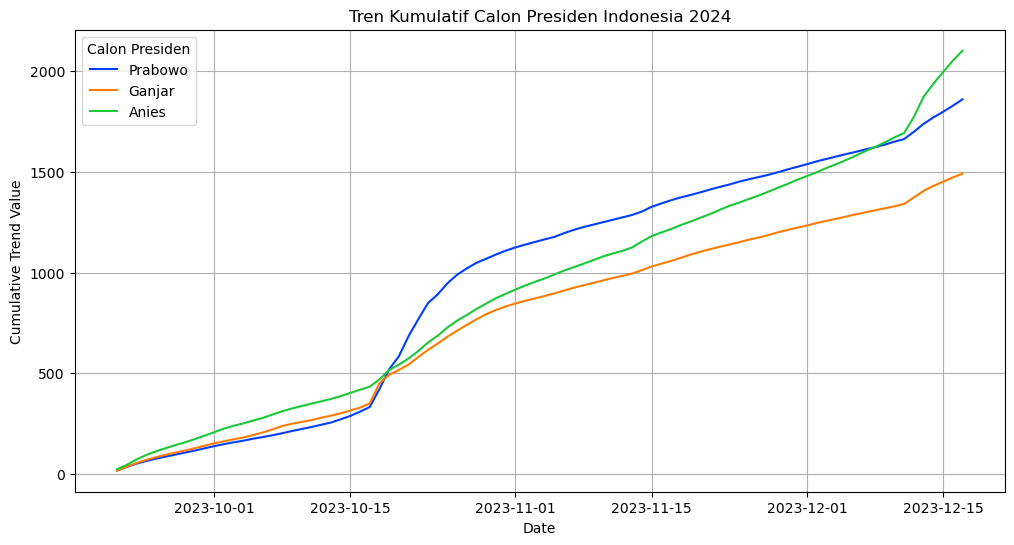

In [44]:
df['Cumulative Trend'] = df.groupby('Name')['Trend Value'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Cumulative Trend', hue='Name', palette='bright')

plt.title('Tren Kumulatif Calon Presiden Indonesia 2024')
plt.xlabel('Date')
plt.ylabel('Cumulative Trend Value')
plt.legend(title='Calon Presiden')
plt.grid(True)
plt.show()

Tampak bahwa trend Ganjar yang paling stabil dan paling rendah dibandingkan kedua capres lainnya.

Trend Prabowo mengalami kenaikan pesat setelah resmi menggandeng Gibran sebagai calon wakil presidennya.

Namun, setelah debat capres perdana tanggal 12 Desember 2023, trend Anies langsung meningkat dan menyalip trend Prabowo.

Sampai tanggal 17 Desember 2023, secara keseluruhan trend Anies masih lebih unggul dibandingkan Ganjar dan Prabowo.